<a href="https://colab.research.google.com/github/SethuSA/CMP7005-Programming-for-data-analysis/blob/main/Final_Assignment_CMP7005.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CMP7005-PRAC1 Indian Air Quality**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /'/content/drive/MyDrive/Colab/xx'

/content/drive/MyDrive/Colab/xx


In [ ]:
%ls

Ahmedabad_data.csv       Chennai_data.csv     Kolkata_data.csv
Aizawl_data.csv          Coimbatore_data.csv  Lucknow_data.csv
all_cities_combined.csv  Delhi_data.csv       Mumbai_data.csv
all_cities_merged.csv    Ernakulam_data.csv   Patna_data.csv
Amaravati_data.csv       Gurugram_data.csv    Shillong_data.csv
Amritsar_data.csv        Guwahati_data.csv    Talcher_data.csv
Bengaluru_data.csv       Hyderabad_data.csv   Thiruvananthapuram_data.csv
Bhopal_data.csv          Jaipur_data.csv      Visakhapatnam_data.csv
Brajrajnagar_data.csv    Jorapokhar_data.csv
Chandigarh_data.csv      Kochi_data.csv


In [ ]:
# Imports for this file
import pandas as pd
import numpy as np
import glob
import os

# For nicer Display
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 120)


Task-1 Data handling

In [ ]:
csv_files = glob.glob("//content/drive/MyDrive/Colab/xx/*_data.csv")
print("Number of CSV files found:", len(csv_files))



Number of CSV files found: 26


In [ ]:
# Sorting file list
csv_files = sorted(csv_files)
print("Files found:")
for f in csv_files:
    print("  -", os.path.basename(f))

Files found:
  - Ahmedabad_data.csv
  - Aizawl_data.csv
  - Amaravati_data.csv
  - Amritsar_data.csv
  - Bengaluru_data.csv
  - Bhopal_data.csv
  - Brajrajnagar_data.csv
  - Chandigarh_data.csv
  - Chennai_data.csv
  - Coimbatore_data.csv
  - Delhi_data.csv
  - Ernakulam_data.csv
  - Gurugram_data.csv
  - Guwahati_data.csv
  - Hyderabad_data.csv
  - Jaipur_data.csv
  - Jorapokhar_data.csv
  - Kochi_data.csv
  - Kolkata_data.csv
  - Lucknow_data.csv
  - Mumbai_data.csv
  - Patna_data.csv
  - Shillong_data.csv
  - Talcher_data.csv
  - Thiruvananthapuram_data.csv
  - Visakhapatnam_data.csv


In [ ]:
import pandas as pd
import numpy as np
import glob
import os

data_path = "//content/drive/MyDrive/Colab/xx/*.csv"

# Find all CSV files in the folder
csv_files = [f for f in glob.glob(data_path) if "all_cities_combined" not in f]

print("Number of CSV files found:", len(csv_files))

csv_files = sorted(csv_files)
print("\nFiles found:")
for f in csv_files:
    print("  -", os.path.basename(f))

# Merge all datasets
df_list = []

for file_path in csv_files:
    file_name = os.path.basename(file_path)
    city_name = file_name.replace("_data.csv", "")

    print(f"\nLoading: {city_name}")

    df_city = pd.read_csv(file_path)
    df_city["City"] = city_name

    df_list.append(df_city)

all_data = pd.concat(df_list, ignore_index=True)

print("\n Merged dataset created successfully!")
print("Shape:", all_data.shape)

# Save merged dataset back to Drive
merged_save_path = "//content/drive/MyDrive/Colab/xx/all_cities_merged.csv"
all_data.to_csv(merged_save_path, index=False)

print("\nMerged file saved to:", merged_save_path)


Number of CSV files found: 27

Files found:
  - Ahmedabad_data.csv
  - Aizawl_data.csv
  - Amaravati_data.csv
  - Amritsar_data.csv
  - Bengaluru_data.csv
  - Bhopal_data.csv
  - Brajrajnagar_data.csv
  - Chandigarh_data.csv
  - Chennai_data.csv
  - Coimbatore_data.csv
  - Delhi_data.csv
  - Ernakulam_data.csv
  - Gurugram_data.csv
  - Guwahati_data.csv
  - Hyderabad_data.csv
  - Jaipur_data.csv
  - Jorapokhar_data.csv
  - Kochi_data.csv
  - Kolkata_data.csv
  - Lucknow_data.csv
  - Mumbai_data.csv
  - Patna_data.csv
  - Shillong_data.csv
  - Talcher_data.csv
  - Thiruvananthapuram_data.csv
  - Visakhapatnam_data.csv
  - all_cities_merged.csv

Loading: Ahmedabad

Loading: Aizawl

Loading: Amaravati

Loading: Amritsar

Loading: Bengaluru

Loading: Bhopal

Loading: Brajrajnagar

Loading: Chandigarh

Loading: Chennai

Loading: Coimbatore

Loading: Delhi

Loading: Ernakulam

Loading: Gurugram

Loading: Guwahati

Loading: Hyderabad

Loading: Jaipur

Loading: Jorapokhar

Loading: Kochi

Load

**Task 1 Data Handling Review**

In this step, I combined multiple city-wise air quality datasets into a single master DataFrame. Each CSV file represents measurements from one Indian city and follows a similar column structure.

To avoid hard-coding file names, I used the `glob` library to automatically detect all files ending with `_data.csv` in the working directory. For each file, I extracted the city name from the filename (e.g. `Ahmedabad_data.csv` → `Ahmedabad`) and stored it in a new `City` column. I then loaded each CSV into a separate pandas DataFrame and concatenated all of them into one dataset called `all_data`.

This merged dataset contains air quality measurements for multiple cities across India and will be used as the basis for all further exploratory analysis and modelling.


Fundamental Data Understanding
**bold text**
After constructing the merged dataset, I performed an initial exploration to understand its structure and quality. I inspected the first few rows, checked the overall shape (number of rows and columns), and listed all column names. I also examined data types and non-null counts to identify which variables are numerical and which contain missing values.

Using `describe()`, I generated summary statistics for the numerical features to get a sense of their typical ranges and variability. I then calculated the number of missing values per column and counted duplicate rows. Finally, I verified that the `City` column correctly lists all the different cities present in the dataset, and I converted the `Date` column to a proper datetime format.

This fundamental understanding step helps to reveal potential data quality issues (such as missing or inconsistent values) and confirms that the merging process across multiple city files was successful.


In [ ]:
# Finding missing values per column
print(all_data.isna().sum())


City              0
Date              0
PM2.5         18392
PM10          44560
NO            14328
NO2           14340
NOx           16740
NH3           41312
CO             8236
SO2           15416
O3            16088
Benzene       22492
Toluene       32164
Xylene        72436
AQI           18724
AQI_Bucket    18724
dtype: int64


→ Key Observations:
- *Xylene* has extremely high missing values around92%, its not usabale, so should be droped
- *PM10, NH3, Toluene* also have the large gaps but still usable after imputation
- *AQI* and *AQI_Bucket* missing together
- City and Data are complete

In [ ]:
# Task 2 Data Pre-processing
clean_data = all_data.copy()

# 1. Drop columns with extremely high missing values
threshold = 0.80  # drop columns with >80% missing values
cols_to_drop = []

for col in clean_data.columns:
    missing_ratio = clean_data[col].isna().mean()
    if missing_ratio > threshold:
        cols_to_drop.append(col)

print("Columns dropped due to excessive missing values:", cols_to_drop)

clean_data.drop(columns=cols_to_drop, inplace=True, errors="ignore")

# 2. Convert Date column to datetime
clean_data["Date"] = pd.to_datetime(clean_data["Date"], errors="coerce")

# Extract Year & Month for analysis
clean_data["Year"] = clean_data["Date"].dt.year
clean_data["Month"] = clean_data["Date"].dt.month


# 3. Remove duplicate rows
duplicates = clean_data.duplicated().sum()
print("Duplicate rows:", duplicates)

clean_data.drop_duplicates(inplace=True)

# 4. City-wise median imputation for pollutants

pollutant_columns = [
    col for col in clean_data.columns
    if col not in ["City", "Date", "AQI_Bucket", "Year", "Month"]
    and clean_data[col].dtype != "object"
]

print("Numeric pollutant columns to impute:", pollutant_columns)

# Apply median imputation grouped by city
for col in pollutant_columns:
    clean_data[col] = clean_data.groupby("City")[col].transform(
        lambda x: x.fillna(x.median())
    )


# 5. Fix AQI and AQI_Bucket issues
# Simple fill of AQI missing using city median (baseline approach)
if "AQI" in clean_data.columns:
    clean_data["AQI"] = clean_data.groupby("City")["AQI"].transform(
        lambda x: x.fillna(x.median())
    )

# If AQI_Bucket still missing, fill with "Unknown"
if "AQI_Bucket" in clean_data.columns:
    clean_data["AQI_Bucket"] = clean_data["AQI_Bucket"].fillna("Unknown")

print("\nPre-processing complete!")
print("Final dataset shape:", clean_data.shape)


Columns dropped due to excessive missing values: []
Duplicate rows: 62099
Numeric pollutant columns to impute: ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']

Pre-processing complete!
Final dataset shape: (56025, 18)


-from the all the data set i cleaned and prepared the merged datast. The first issue i found in the data handling step was the presence of missing values across almost all pollutant columns. Some variables such as Xylene contained more than 90% missing values, making them unsutable for analysis or modeling so this column was removed entirely.

-For the remaing numerical varible i applied a city wise median imputation strategy. Air quality levels vary signficantly between cities therefore, calculating a global median could bias the dataset. Using a per-city median ensures the imputed values reflect the local pollution characteristics.

-Duplicated rows were also checked and removed.

Task2 c - **Statistical and Visual Analysis**

In this section, I use a range of visualisation techniques to better understand the distribution of pollutants, compare air quality across cities, and explore relationships between variables. The analysis includes univariate distribution plots, city-level comparison charts, time series trends, and a correlation heatmap. All plots are designed with a clean, minimal style suitable for technical reporting.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Theme
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.titlesize"] = 14
plt.rcParams["axes.labelsize"] = 12
plt.rcParams["xtick.labelsize"] = 10
plt.rcParams["ytick.labelsize"] = 10

# confirm columns:
clean_data.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene',
       'AQI', 'AQI_Bucket', 'Year', 'Month'],
      dtype='object')

1 Univariate analysis - distrubutions of key pollutants



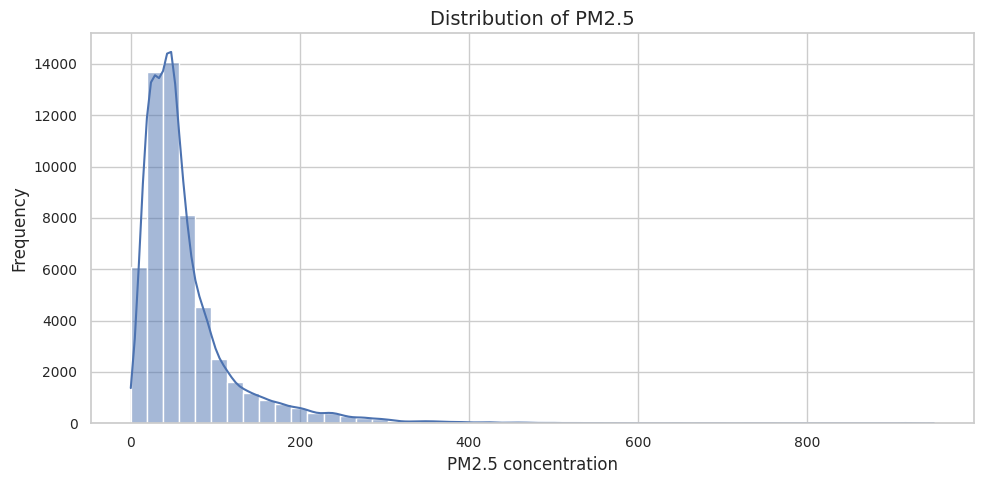

In [ ]:
# Distribution of PM2.5
plt.figure()
sns.histplot(clean_data["PM2.5"], bins=50, kde=True)
plt.title("Distribution of PM2.5")
plt.xlabel("PM2.5 concentration")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


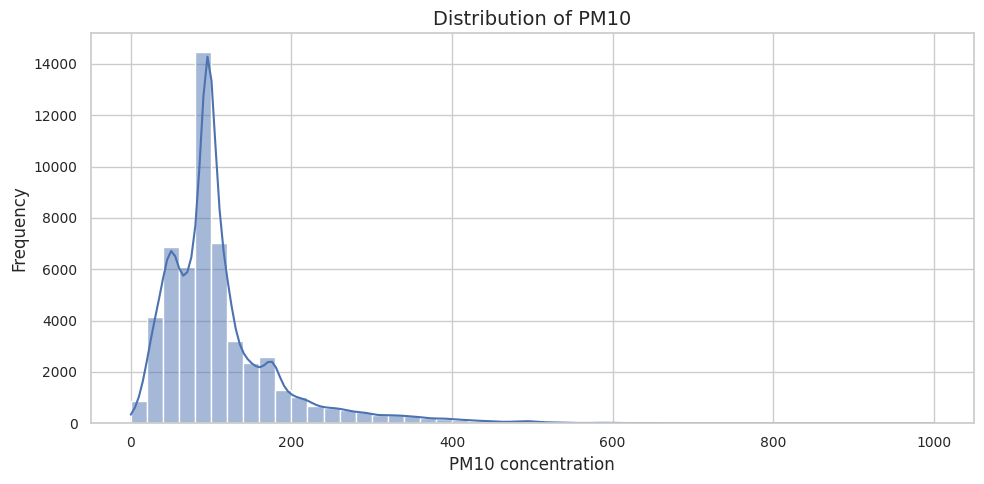

In [ ]:
# PM10 distibution
plt.figure()
sns.histplot(clean_data["PM10"], bins=50, kde=True)
plt.title("Distribution of PM10")
plt.xlabel("PM10 concentration")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


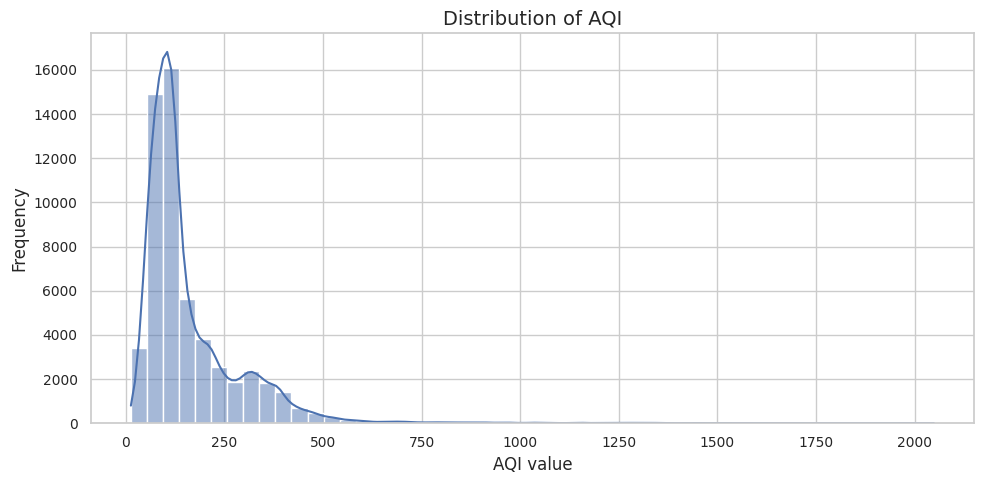

In [ ]:
# AQI distribution
plt.figure()
sns.histplot(clean_data["AQI"], bins=50, kde=True)
plt.title("Distribution of AQI")
plt.xlabel("AQI value")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


#### City-level comparison

To compare air quality between locations, I calculated the average PM2.5 and AQI for each city and visualised the top 10 most polluted cities. The bar charts show clear variability in air quality across cities, with some locations consistently exhibiting higher average concentrations and AQI values than others.

This comparison highlights which cities experience poorer air quality on average and motivates more detailed time-based analysis in later steps.


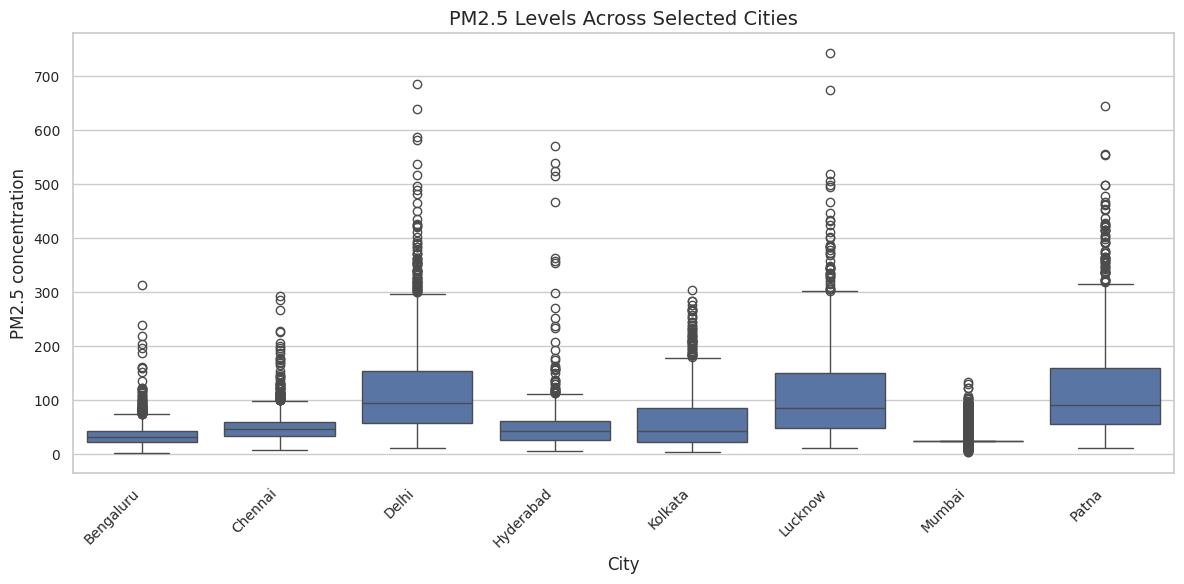

In [ ]:
selected_cities = ["Delhi", "Mumbai", "Kolkata", "Chennai", "Hyderabad", "Bengaluru", "Lucknow", "Patna"]

subset = clean_data[clean_data["City"].isin(selected_cities)]

plt.figure(figsize=(12, 6))
sns.boxplot(x="City", y="PM2.5", data=subset)
plt.title("PM2.5 Levels Across Selected Cities")
plt.xlabel("City")
plt.ylabel("PM2.5 concentration")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


#### Variability of PM2.5 across selected cities

I used boxplots to compare the distribution of PM2.5 values across a set of major Indian cities. The boxplots illustrate both the central tendency and the spread of pollution levels, as well as the presence of extreme outliers.

Some cities show a wider spread and more extreme upper outliers, indicating more volatile air quality with frequent high-pollution events. Others appear more stable, with a tighter interquartile range.


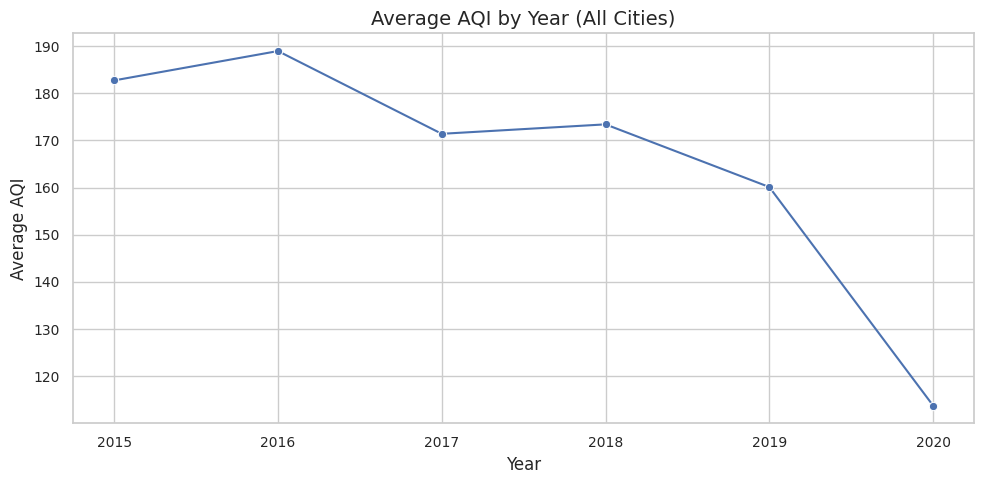

In [ ]:
# Overall yearly mean AQI
yearly_aqi = clean_data.groupby("Year")["AQI"].mean()

plt.figure()
sns.lineplot(x=yearly_aqi.index, y=yearly_aqi.values, marker="o")
plt.title("Average AQI by Year (All Cities)")
plt.xlabel("Year")
plt.ylabel("Average AQI")
plt.tight_layout()
plt.show()


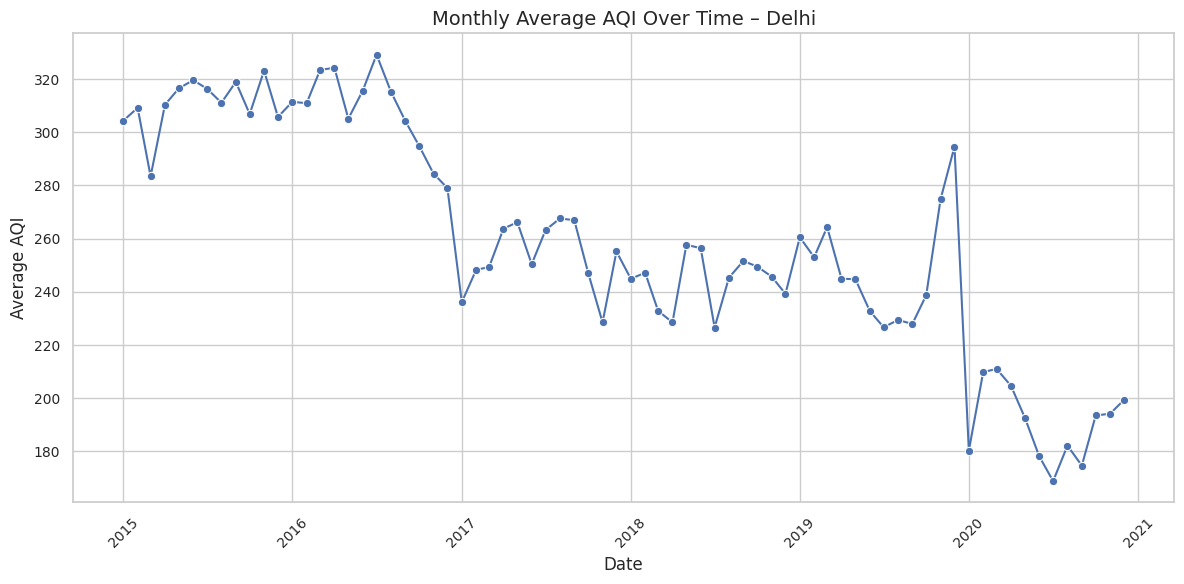

In [ ]:
city_name = "Delhi"  # change to any city name
city_df = clean_data[clean_data["City"] == city_name]

# Monthly AQI
monthly_aqi = city_df.groupby(["Year", "Month"])["AQI"].mean().reset_index()

# Convert types
monthly_aqi["Year"] = monthly_aqi["Year"].astype(int)
monthly_aqi["Month"] = monthly_aqi["Month"].astype(int)

# Create date column
monthly_aqi["YearMonth"] = pd.to_datetime(
    monthly_aqi["Year"].astype(str) + "-" + monthly_aqi["Month"].astype(str) + "-01",
    format="%Y-%m-%d"
)

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x="YearMonth", y="AQI", data=monthly_aqi, marker="o")
plt.title(f"Monthly Average AQI Over Time – {city_name}")
plt.xlabel("Date")
plt.ylabel("Average AQI")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Temporal trends in AQI

I analysed the temporal behaviour of air quality by aggregating AQI values at yearly and monthly levels. At the national level, the yearly average AQI provides a high-level indication of whether air quality is improving or deteriorating over time.

I also examined the monthly AQI trend for an individual city (e.g. Delhi), which reveals more detailed seasonal patterns. Typically, certain months show consistently higher AQI values, which may be linked to factors such as winter inversion, crop burning, or festival-related emissions.


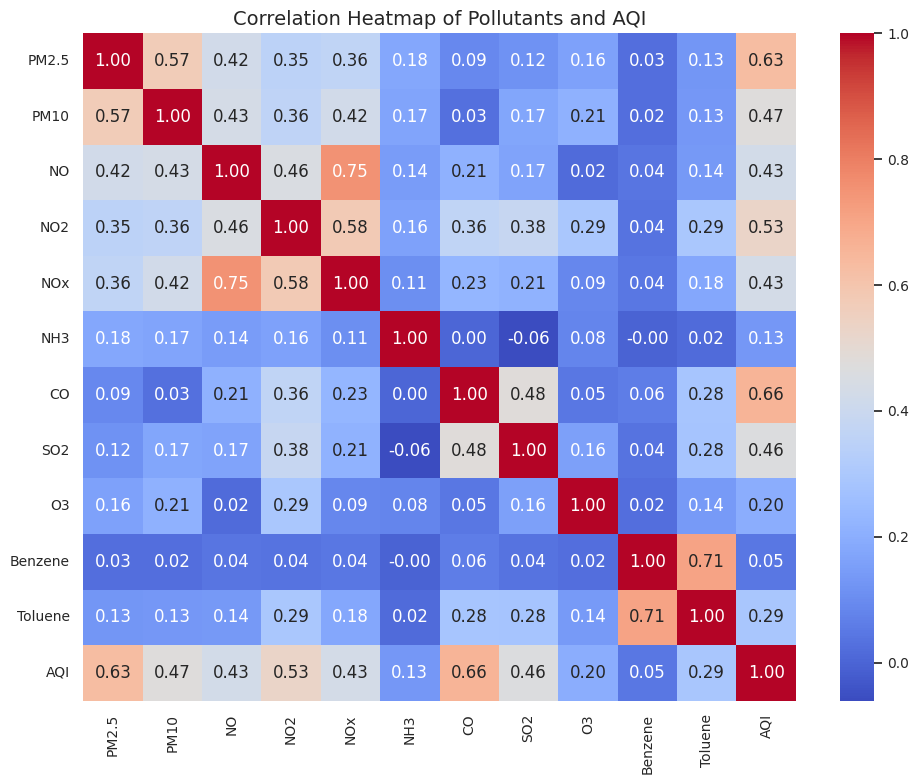

In [ ]:
# Select numeric columns for correlation
num_cols = ["PM2.5", "PM10", "NO", "NO2", "NOx", "NH3", "CO", "SO2", "O3", "Benzene", "Toluene", "AQI"]
num_cols = [c for c in num_cols if c in clean_data.columns]

corr_matrix = clean_data[num_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Pollutants and AQI")
plt.tight_layout()
plt.show()


#### Relationship between pollutants and AQI

To understand how different pollutants relate to each other and to the AQI, I computed a correlation matrix and visualised it as a heatmap. The heatmap reveals which pollutants are strongly positively correlated (e.g. PM2.5 and PM10) and which have weaker relationships.

As expected, AQI tends to show relatively strong positive correlations with particulate matter (PM2.5, PM10) and certain gaseous pollutants. This confirms that these variables are key drivers of overall air quality and should be considered as important features in the subsequent modelling stage.


AQI Caregory Distribution

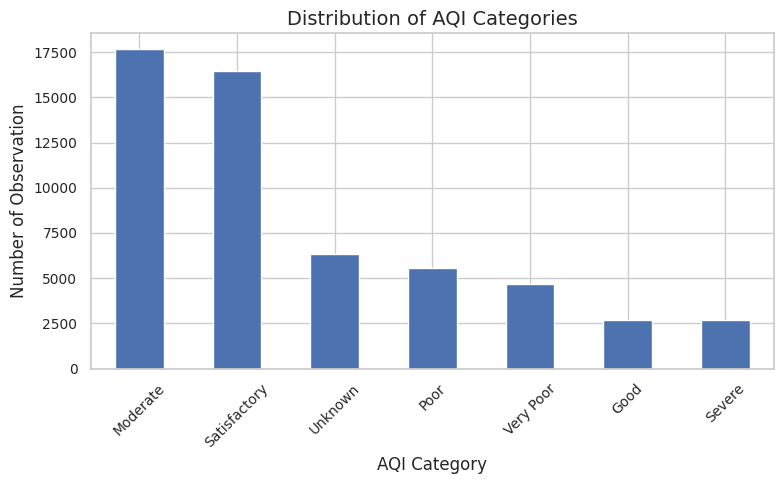

In [ ]:
# Distribution of AQI categories
plt.figure(figsize=(8, 5))
clean_data["AQI_Bucket"].value_counts().plot(kind="bar")
plt.xlabel("AQI Category")
plt.ylabel("Number of Observation")
plt.title("Distribution of AQI Categories")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



This bar charts shows the distribution of AQI categories across the dataset.A large proportion of observations fall into the moderate and poor categories,indicating widespread air quality issues across multiple cities

Smoothed Trend Analysis Of AQI

To analyse short term temporal patterns in air quality,a 7-day rolling average of AQI value was calculated for a selected city(Delhi).This smoothing technique reduces daily fluctuations and highlights underlying trends in air quality overtime.The smoothed AQI curve provides a clearer view of persistent pollution periods and seasonal variation,which may be influemced by meteorological conditions and human activities

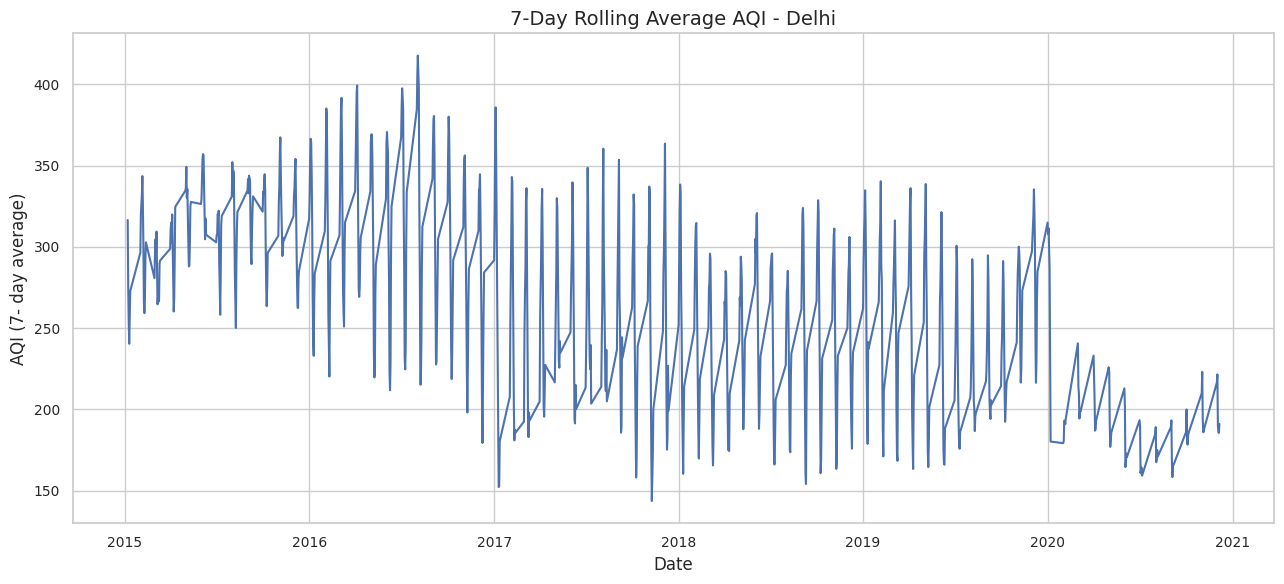

In [ ]:
# 7-day rolling average AQI for a selected city
city = 'Delhi'

# Filter data for the selected city and sort by date
city_df = clean_data[clean_data["City"] == city].sort_values("Date")

# Calcualte 7-day rolling average ofAQI
city_df["AQI_7DAY"] = city_df['AQI'].rolling(window=7).mean()

#plot the smoothed AQI trend
plt.figure(figsize=(13, 6))
sns.lineplot(x="Date", y="AQI_7DAY", data=city_df)
plt.title(f"7-Day Rolling Average AQI - {city}")
plt.xlabel("Date")
plt.ylabel("AQI (7- day average)")
plt.tight_layout()
plt.show()

TASK3:Model Building And AQI Prediction


In this task a predictive modelling is applied to estimate the air quality index(AQI)using pollutant concentration measurment from the dataset

3.1 Preparing the Data for Modelling

In this cleaned dataset is prepared for modelling by creating a working copy and inspect its structure

In [ ]:
# Create a copy of the cleaned dataset for modelling
df = clean_data.copy()

#Inspect columns and dataset size
print("columns in dataset:")
print(df.columns.tolist())

print("\nDataset shape:")
print(df.shape)


columns in dataset:
['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket', 'Year', 'Month']

Dataset shape:
(56025, 18)


3.2 Selecting Features and Splitting the Data

In [ ]:
from sklearn.model_selection import train_test_split

# Define target variable
target = "AQI"

# Select input features
features = ["PM2.5", "PM10", "NO", "NO2", "NOx", "NH3", "CO", "SO2", "O3", ]
features = [ f for f in features if f in df.columns]


df_model = df.dropna(subset=features + [target]).copy()


X = df[features]
y = df[target]

print("Missing values check (should be 0):")
print(X.isna().sum())
print("Final modelling dataset shape:", X.shape)


Missing values check (should be 0):
PM2.5       0
PM10     1994
NO          0
NO2         0
NOx      1020
NH3      1650
CO          0
SO2         0
O3        160
dtype: int64
Final modelling dataset shape: (56025, 9)


3.3 Feature Scaling

Feature scaling is applied to standardise the input variable so that all pollutant features contribute equally to the model.

In [ ]:
# Import Function to split th dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Define the target variable
target = "AQI"

# Seelect relevant pollutant features for modelling
features = ["PM2.5", "PM10", "NO", "NO2", "NOx", "NH3", "CO", "SO2", "O3"]

#keep only features that exist in the dataset(
features = [f for f in features if f in clean_data.columns]

#Remove rows with missing value in selected feature
df_model = clean_data.dropna(subset=features + [target]).copy()

X = df_model[features]
y = df_model[target]

# split the data into training
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform both sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape

((40960, 9), (10241, 9))

3.4 Model Training


A Linear regression model is trained using the scaled training data to learn the relationship between pollutant concentration and AQI

In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)

LinearRegression()

3.5 Model Evaluation

In this trained model is evaluated on the unseen datatest to measure prediction accuracy

3.5.1 Linear Regression Model Evaluation
In this the performsnce of the linear Regression model is evaluated using the test dataset

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE:, {mae:.2f}")
print(f"RMSE:, {rmse:.2f}")
print(f"R2 Score:, {r2:.3f}")

MAE:, 29.12
RMSE:, 52.85
R2 Score:, 0.794


The Linear Regression model achieved an MAE of 29.12 and an RMSE of 52.85, indicating a reasonable level of prediction accuracy.The R2 score of suggests that themodel explains approximately 79% of the variance

3.5.2 Visual Evaluation:Actual vs Predicted AQI
This scatter plot the relationship between the actual AQI values and the predicted AQI values produced by the linear Regression model on the test dataset

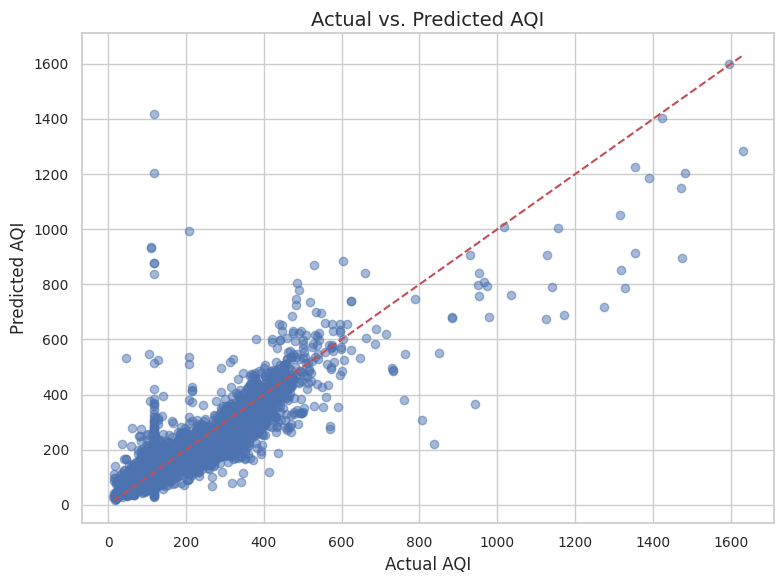

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot: Actual vs Predicted AQI
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)

# Perfect prediction reference line
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    'r--'
)

plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Actual vs. Predicted AQI")
plt.tight_layout()
plt.show()

3.5.3 Random Forest Model Evaluation
In this a Random Forest Regressor was trained to predict AQI values using the same training and test datasets as the Linear Regression model.
 The model was trained using 200 decision trees,with a fixed random state to ensure reproducibility.Predictions were generated on the unseen test set and evaluated using three standard regression metrics:Mean Absolute Error(MAE),Root Mean Squared Error(RMSE),and R2 score  

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Train Random Forest model (create it from scratch)
rf_model = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest MAE: {mae_rf:.2f}")
print(f"Random Forest RMSE: {rmse_rf:.2f}")
print(f"Random Forest R2 Score: {r2_rf:.3f}")


Random Forest MAE: 13.72
Random Forest RMSE: 32.49
Random Forest R2 Score: 0.922


3.5.4 Model Performance Comparison and Performance Analysis

This part compares the performance of the Linear Regression and Random Forest model using three evaluation metrics:Mean Absolute Error(MAE),Root Mean summarises the predictive accuracy of both models on the same test dataset.


In [ ]:
import pandas as pd

comparison_df = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "MAE": [mae, mae_rf],
    "RMSE": [rmse, rmse_rf],
    "R2 Score": [r2, r2_rf]
})

comparison_df


,Model,MAE,RMSE,R2 Score
0,Linear Regression,29.12187,52.854402,0.793546
1,Random Forest,13.72204,32.493993,0.921969


4.Conclusion

This Study investigated air quality trends across major cities using a comprehensive air pollution dataset and applied machine learning techniques to predict the Air Quality Index.The work began with detailed data cleaning and preprocessing,followed by exploratory data analysis to understand pollutant behaviour,temporal trends,and relatioships between pollutants and AQI